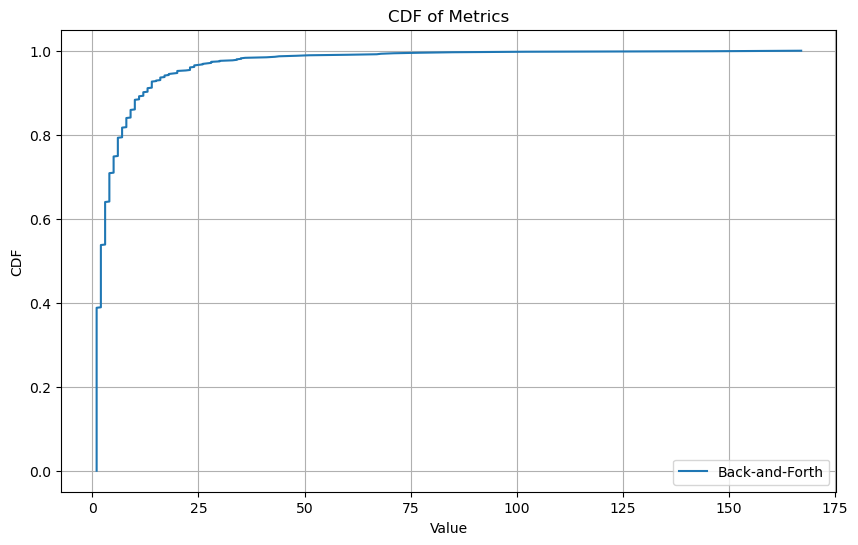

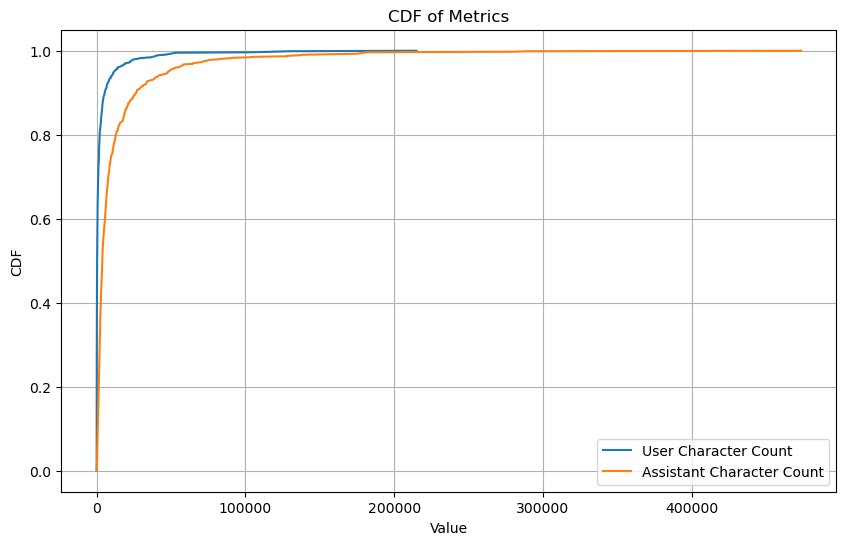

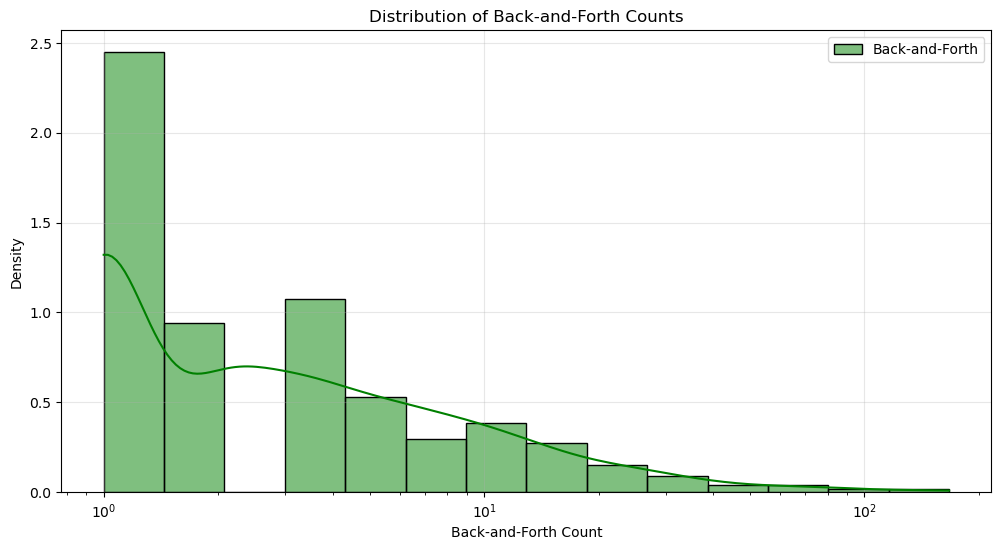

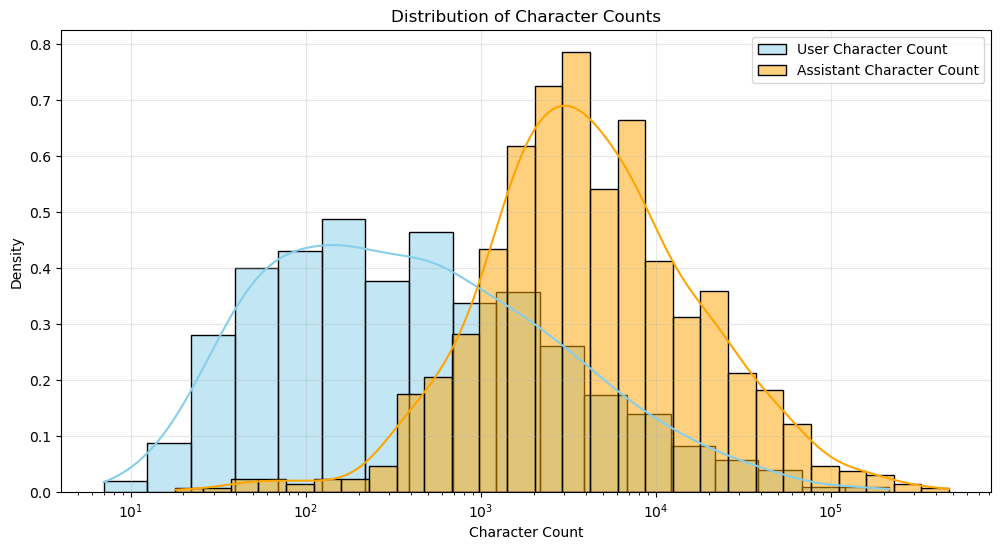

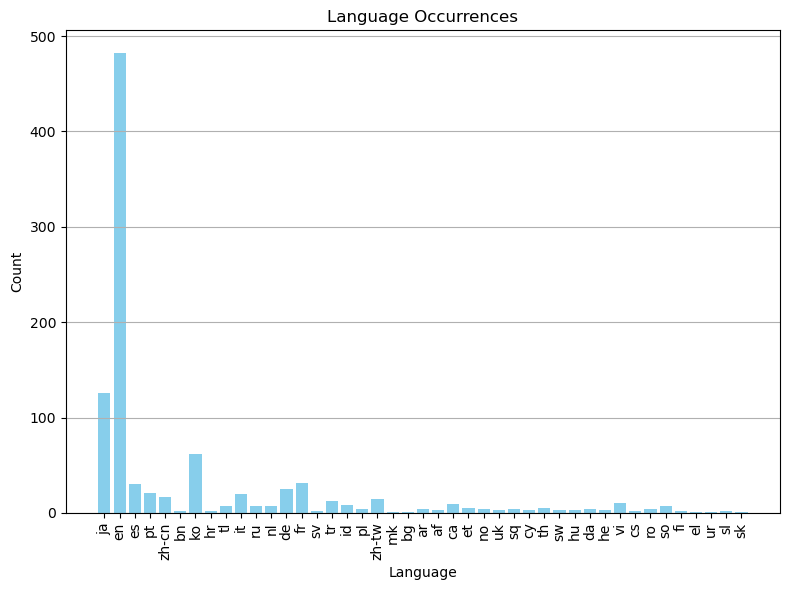

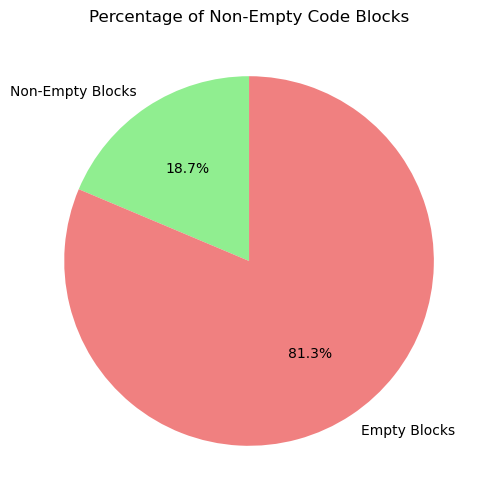

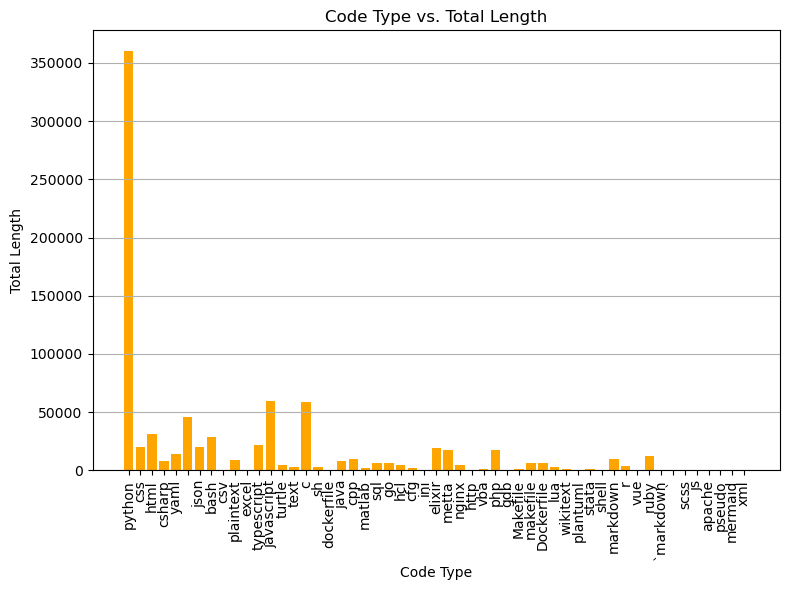

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import json
import seaborn as sns

# Example JSON-like data
data = [
    {
        "conversation": "67440312-0c0c-8009-9d80-1ed5f34fef4a.json",
        "backNforth": 2,
        "langs": ["en"],
        "charcount_user": 90,
        "charcount_assistant": 3993,
        "code_blocks": [
            [
                {"type": "python", "length": 41},
                {"type": "python", "length": 85},
                {"type": "python", "length": 55},
                {"type": "python", "length": 64},
            ],
            [
                {"type": "python", "length": 143},
                {"type": "python", "length": 217},
                {"type": "python", "length": 180},
                {"type": "python", "length": 55},
                {"type": "python", "length": 100},
            ],
        ],
    }
]

with open('conv_analysis_basic.json', 'r') as f:
    data = json.load(f)

# Extract data for plotting
backNforth = [d["backNforth"] for d in data]
charcount_user = [d["charcount_user"] for d in data]
charcount_assistant = [d["charcount_assistant"] for d in data]

# Flatten and count language occurrences
langs = [lang for d in data for lang in d["langs"]]
lang_counts = Counter(langs)

# Calculate code block statistics
non_empty_code_blocks = sum(1 for d in data if any(d["code_blocks"]))
total_blocks = len(data)
non_empty_percentage = (non_empty_code_blocks / total_blocks) * 100

# Flatten code block data for bar plot
code_type_lengths = Counter()
for d in data:
    for block_list in d["code_blocks"]:
        for block in block_list:
            if len(block["type"]) < 20:
                code_type_lengths[block["type"]] += block["length"]

plt.figure(figsize=(10, 6))
for metric, label in zip([backNforth],
                         ["Back-and-Forth"]):
    sorted_data = np.sort(metric)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=label)
plt.title("CDF of Metrics")
plt.xlabel("Value")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

# Plot CDF for backNforth, charcount_user, and charcount_assistant
plt.figure(figsize=(10, 6))
for metric, label in zip([charcount_user, charcount_assistant],
                         ["User Character Count", "Assistant Character Count"]):
    sorted_data = np.sort(metric)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=label)
plt.title("CDF of Metrics")
plt.xlabel("Value")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

# Plot histogram with KDE for charcount_user and charcount_assistant
plt.figure(figsize=(12, 6))
plt.xscale('log')
sns.histplot(backNforth, kde=True, color="green", label="Back-and-Forth", stat="density")
plt.title("Distribution of Back-and-Forth Counts")
plt.xlabel("Back-and-Forth Count")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
plt.xscale('log')
sns.histplot(charcount_user, kde=True, color="skyblue", label="User Character Count", stat="density")
sns.histplot(charcount_assistant, kde=True, color="orange", label="Assistant Character Count", stat="density")
plt.title("Distribution of Character Counts")
plt.xlabel("Character Count")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Bar plot for language occurrences
plt.figure(figsize=(8, 6))
plt.bar(lang_counts.keys(), lang_counts.values(), color="skyblue")
plt.title("Language Occurrences")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.grid(axis='y')
plt.show()

# Pie chart for non-empty code blocks percentage
plt.figure(figsize=(8, 6))
plt.pie([non_empty_code_blocks, total_blocks - non_empty_code_blocks],
        labels=["Non-Empty Blocks", "Empty Blocks"],
        autopct="%1.1f%%",
        startangle=90,
        colors=["lightgreen", "lightcoral"])
plt.title("Percentage of Non-Empty Code Blocks")
plt.show()

# Bar plot for code type vs length
plt.figure(figsize=(8, 6))
plt.bar(code_type_lengths.keys(), code_type_lengths.values(), color="orange")
plt.title("Code Type vs. Total Length")
plt.xlabel("Code Type")
plt.ylabel("Total Length")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.grid(axis='y')
plt.show()
